# Принятие решений в бизнесе - проект Яндекс Практикум

<h1>Описание проекта</h1> 


<div style="border:solid lightgreen 2px; padding: 20px">
   
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.  
   
</div>

<div style="border:solid darkblue 2px; padding: 20px">

<h1>План выполнения проекта:</h1>  
      
**Часть 1. Приоритизация гипотез.**  
      
В файле hypothesis.csv - 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
      
**Задача:**  
* Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.  
* Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.  
* Укажем, как изменилась приоритизация гипотез при применении RICE вместо ICE. Сделаем выводы.
  
**Часть 2. Анализ A/B-теста.**    
      
Провели A/B-тест и получили результаты, которые описаны в файлах orders.csv и visitors.csv.  
    
**Задача:**  
      
Проанализируйте A/B-тест:  
      
* Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.  
* Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.  
* Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.  
* Построим график кумулятивного среднего количества заказов по группам. Сделаем выводы и предположения.  
* Построим график относительного изменения кумулятивного среднего количества заказов группы B к группе A. Сделаем выводы и предположения.  
* Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.  
* Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей. 
* Построим точечный график стоимостей заказов. Сделаем выводы и предположения.  
* Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.  
* Посчитаем статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным. Сделаем выводы и предположения.  
* Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.  
* Посчитаем статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным. Сделаем выводы и предположения.  
* Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.  
* Примим решение по результатам теста и объясним его.  
      
**Варианты решений:**  
      
1. Остановить тест, зафиксировать победу одной из групп.   
2. Остановить тест, зафиксировать отсутствие различий между группами.   
3. Продолжить тест.  
    
</div>

<div style="border:solid purple 2px; padding: 20px">
      
<h1>Описание данных</h1> 
      
**Данные для первой части:**  
      
Файл hypothesis.csv  
    
*Hypothesis* — краткое описание гипотезы;  
*Reach* — охват пользователей по 10-балльной шкале;  
*Impact* — влияние на пользователей по 10-балльной шкале;  
*Confidence* — уверенность в гипотезе по 10-балльной шкале;  
*Efforts* — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.  
      
**Данные для второй части**  
      
Файл orders.csv  
      
*transactionId* — идентификатор заказа;  
*visitorId* — идентификатор пользователя, совершившего заказ;  
*date* — дата, когда был совершён заказ;  
*revenue* — выручка заказа;  
*group* — группа A/B-теста, в которую попал заказ.  
      
Файл visitors.csv  
      
*date* — дата;  
*group* — группа A/B-теста;  
*visitors* — количество пользователей в указанную дату в указанной группе A/B-теста.     
     
</div>

# Загрузим данные и подготовим их к анализу

In [1]:
# импортируем библиотеки

import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
#считываем датасет

try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    hypothesis = pd.read_csv('hypothesis.csv')
    orders = pd.read_csv('orders.csv')
    visitors = pd.read_csv('visitors.csv')

In [3]:
# получаем общую информацию и изучаем первые строки датафрейма hypothesis

hypothesis.info()
pd.options.display.max_colwidth = 100
hypothesis.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


In [4]:
# приводём колонки к нижнему регистру

hypothesis.columns = map(str.lower, hypothesis.columns)
hypothesis.head(5)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


Датасет hypothesis содержит следующую информацию:

*hypothesis* — краткое описание гипотезы;  
*reach* — охват пользователей по 10-балльной шкале;  
*impact* — влияние на пользователей по 10-балльной шкале;  
*confidence* — уверенность в гипотезе по 10-балльной шкале;  
*efforts* — затраты ресурсов на проверку гипотезы по 10-балльной шкале.  

In [5]:
# проверяем наличие явных дубликатов

print('Количество явных дубликатов:', hypothesis.duplicated().sum())

Количество явных дубликатов: 0


**Применим фреймворк ICE для приоритизации гипотез**

Формула для нахождения ICE:

***ICE score = (Impact * Confidence) / Efforts***

In [6]:
# рассчитаем показатель ICE
hypothesis['ICE'] = round((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts'])

# сортируем по результатам ICE
hypothesis.sort_values(by='ICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3,8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3,7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.0


Видим, что гипотезы 8, 0, 7, 6 и 2 являются наиболее приоритетными задачами с позиции вероятного влияния их на выручку, без учёта пользовательского охвата.

**Применение фреймворка RICE для приоритизации гипотез**

Формула для нахождения RICE:

***RICE score = (Reach * Impact * Confidence) / Efforts***

In [7]:
# рассчитаем показатель RICE
hypothesis['RICE'] = round((hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts'])

# сортируем по результатам RICE
hypothesis.sort_values(by='RICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.0,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3,7.0,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.0,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3,8.0,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.0,16.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.0,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.0,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0,3.0


Видно, что при расчёте методом RICE порядок изменился - самыми перспективными гипотезами будут в порядке убывания 7, 2, 0, 6 и 8.

***Вывод:***
<div style="border:solid green 1px; padding: 20px">
    
Самая перспективная гипотеза по ICE - это "Запустить акцию, дающую скидку на товар в день рождения", 9 по значениям impact и confidence, и с всего 1 по reach. Таким образом, влияние минимально, затронет небольшое количество пользователей.  
  
А самая перспективная по RICE - это "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", у неё reach все 10, а impact и confidence 7 и 8 соответственно.  
    Действительно, добавление формы подписки имеет гораздо большее влияние и охват, а оставившие свой email пользователи скорее всего лояльны к компании и могут хорошо сконвертироваться в будущем.  

Также интересно, что топ-5 гипотез по обоим фреймворкам одинаковый, поменялся только порядок. Стоит рассматривать эту пятёрку в первую очередь.    
    
</div>

# Анализ A/B-теста

**Построим график кумулятивной выручки по группам**

In [8]:
# получаем общую информацию и изучаем первые строки датафрейма orders

orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Датасет orders содержит следующую информацию о заказах:  

*transactionId* — идентификатор заказа;  
*visitorId* — идентификатор пользователя, совершившего заказ;  
*date* — дата, когда был совершён заказ;  
*revenue* — выручка заказа;  
*group* — группа A/B-теста, в которую попал заказ.  

In [9]:
# проверяем наличие явных дубликатов

print('Количество явных дубликатов:', orders.duplicated().sum())

Количество явных дубликатов: 0


In [10]:
# получаем общую информацию и изучаем первые строки датафрейма visitors

visitors.info()
visitors.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Датасет visitors содержит следующую информацию о посетителях:  

*date* — дата;  
*group* — группа A/B-теста;  
*visitors* — количество пользователей в указанную дату в указанной группе A/B-теста.  

In [11]:
# проверяем наличие явных дубликатов

print('Количество явных дубликатов:', visitors.duplicated().sum())

Количество явных дубликатов: 0


In [12]:
# приведем тип поля date к datetime  

orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')

In [13]:
# поиск пользователей, попавших в обе группы

duplicated_users = orders.groupby('visitorId').agg({'group':['nunique']})
duplicated_users.columns = ['groups']
duplicated_users = duplicated_users.query('groups > 1')
print('Количество пользователей, попавших в обе группы:', len(duplicated_users))

# очистка таблицы от пользователей, попавших в обе группы

orders = orders.query('visitorId not in @duplicated_users.index')

Количество пользователей, попавших в обе группы: 58


Проверили сколько пользователей попали в обе группы и очистили данные от них.

Для того, чтобы построить график, нужно собрать кумулятивные данные. Для этого:

In [14]:
# создадим массив уникальных пар значений дат и групп теста

datesGroups = orders[['date', 'group']].drop_duplicates()

# соберём агрегированные кумулятивные по дням данные о заказах

ordersAggregated = (datesGroups
                    .apply(lambda x: orders[(orders['date'] <= x['date']) & (orders['group'] == x['group'])]
                        .agg(
                            {'date':'max', 
                             'group':'max', 
                             'transactionId': pd.Series.nunique, 
                             'visitorId': pd.Series.nunique, 
                             'revenue':'sum'}), axis=1)
                    .sort_values(by=['date','group']) 
                   )
ordersAggregated.head(5)

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854


In [15]:
# соберём агрегированные кумулятивные по дням данные о посетителях

visitorsAggregated = (datesGroups
                      .apply(lambda x: visitors[(visitors['date'] <= x['date']) & (visitors['group'] == x['group'])]
                          .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
                      .sort_values(by=['date','group'])
                     )
visitorsAggregated.head(5)

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [16]:
# объединим кумулятивные данные в одной таблице

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


In [17]:
# проверим, совпадает ли минимальная дата в cumulativeData с минимальной датой в исходных данных

cumulativeData['date'].min() == orders['date'].min() == visitors['date'].min()

True

In [18]:
# проверим, совпадает ли максимальная дата в cumulativeData с максимальной датой в исходных данных

cumulativeData['date'].max() == orders['date'].max() == visitors['date'].max()

True

Минимальная и максимальная даты в cumulativeData совпадают с минимальной и максимальной датой в исходных данных, значит датафрейм cummulativeData был создан корректно.

In [19]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date', 'revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B 

cumulativeRevenueB =cumulativeData[cumulativeData['group']=='B'][['date', 'revenue', 'orders']]

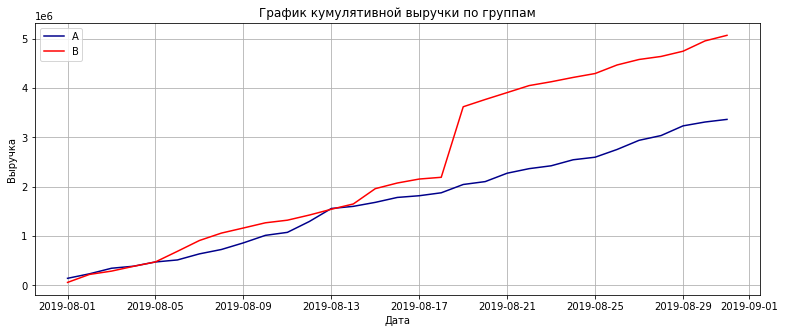

In [20]:
plt.figure(figsize=(13,5))

# строим график выручки группы А

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A', color = 'darkblue')

# строим график выручки группы B

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B', color = 'red')

plt.grid()
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.title('График кумулятивной выручки по группам')
plt.legend();


***Вывод:***
<div style="border:solid green 1px; padding: 20px">

Из графика кумулятивной выручки по сырым данным видим, что А/В-тест длился весь календарный месяц - август 2019г. Причем в первой половине месяца выручка по группам росла примерно равными темпами, и группа В показывала незначительно лучшие результаты. Однако после 17 августа в группе В наблюдается резкий скачок вверх, эта группа существенно оторвалась от А и далее до конца теста темпы прироста выручки практически одинаковы.   
Это может быть и всплеск числа заказов, и появившиеся дорогие заказы в выборке, что и исказило график.  
Принимать решение по этой метрике рано, т.к. требуется дополнительнй анализ выбросов, которые искажают результаты.  
    
</div>

**Построим график кумулятивного среднего чека по группам**

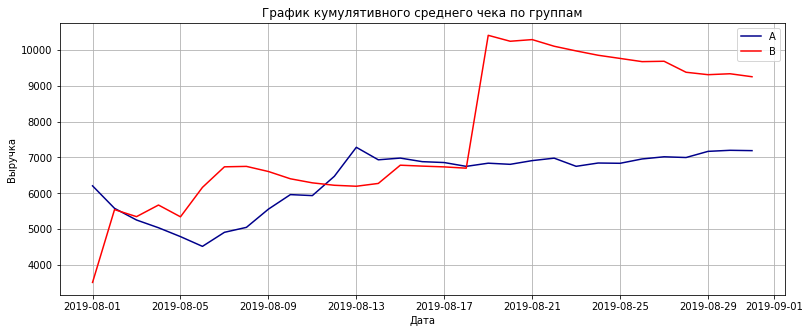

In [21]:
# для этого разделим кумулятивную выручку на кумулятивное число заказов

plt.figure(figsize=(13,5))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A', color = 'darkblue')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B', color = 'red')

plt.grid()
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.title('График кумулятивного среднего чека по группам')
plt.legend();


***Вывод:***
<div style="border:solid green 1px; padding: 20px">

Средний чек примерно до 17-18 числа скачет и потом стабилизируется, однако здесь опять виднен гигантский скачок в группе В. Вероятно, в это время имели место несколько аномально крупных заказов, что ведет к невозможности сделать предположения о разнице в средних чеках по группам.
    
</div>

**Построим график относительного изменения кумулятивного среднего чека группы B к группе A**

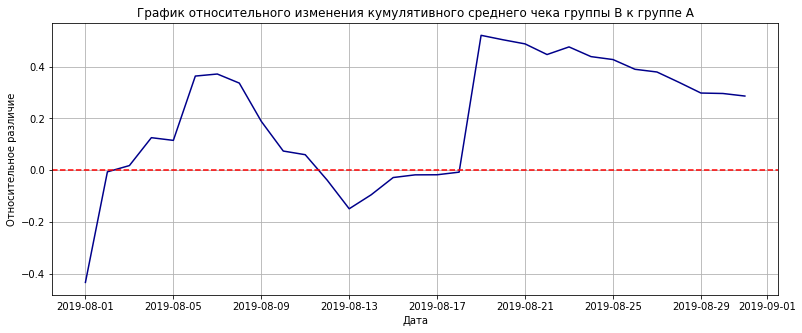

In [22]:
plt.figure(figsize=(13,5))

# для этого собираем данные в одном датафрейме

mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков

plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB'] / mergedCumulativeRevenue['ordersB']
                                          ) / (mergedCumulativeRevenue['revenueA'] / mergedCumulativeRevenue['ordersA'])-1, color = 'darkblue')

# добавляем ось X

plt.axhline(y=0, color='red', linestyle='--')
plt.grid()
plt.ylabel('Относительное различие')
plt.xlabel('Дата')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A');


***Вывод:***
<div style="border:solid green 1px; padding: 20px">
    
Отношение кумулятивного среднего чека группы А к группе В показывает, что данное соотношение за исследуемый период имело два пика, когда средний чек группы B значительно превосходил этот показатель группы А, но быстро снижался после пика.   
Вероятно, такие изменения связаны с наличием выбросов в выборке.  
</div>

**Построим график кумулятивного среднего количества заказов по группам**

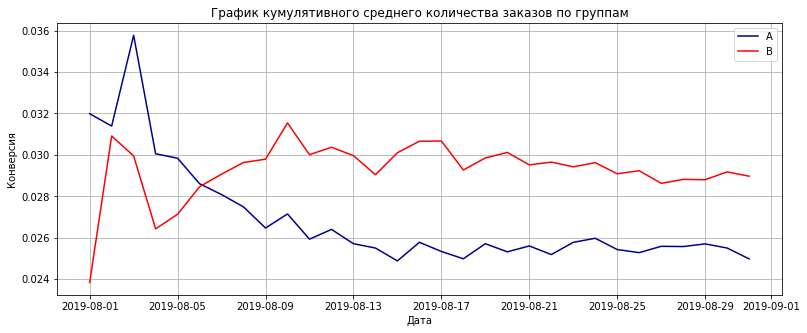

In [23]:
# считаем кумулятивную конверсию

cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']

# отделяем данные по группе A

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B

cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики

plt.figure(figsize=(13,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A', color = 'darkblue')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B', color = 'red')
plt.legend()
plt.grid()
plt.ylabel('Конверсия')
plt.xlabel('Дата')
plt.title('График кумулятивного среднего количества заказов по группам');

***Вывод:***
<div style="border:solid green 1px; padding: 20px">
    
Изначально в первую неделю теста в обеих группах происходит скачок конверсии, далее группы значительно расходятся.   
В группе А просиходит снижение конверсии с 0.036 до уровня 0.030, вокруг которого значение и находится на протяжении всего теста.  
А вот в группе B после скачка до 0.032 происходит резкое снижение значения конверсии до 0.027 с последующим постепенным ростом до 0.032 и относительно стабильным средним значением конверсии в размере 0.030.

В итоге сначала конверсии колебались, но довольно быстро выровнялись и результат группы В оказался стабильно лучше, чем в группе А.  
</div>

**Построим график относительного изменения кумулятивного среднего количества заказов группы B к группе A**

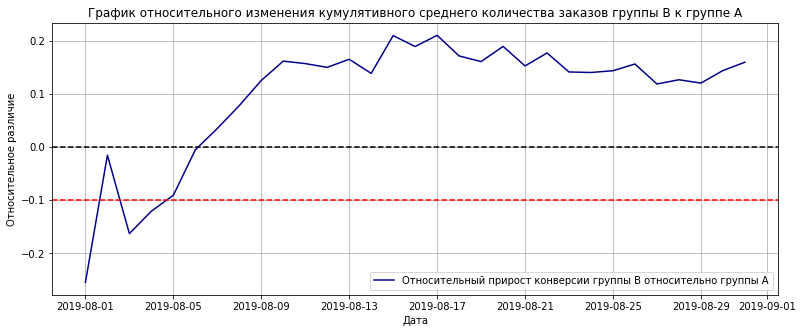

In [24]:
plt.figure(figsize=(13,5))

# собираем данные в один датафрейм

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# строим график

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']
         /mergedCumulativeConversions['conversionA']-1,
         label="Относительный прирост конверсии группы B относительно группы A", color = 'darkblue')
plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='red', linestyle='--')
plt.grid()
plt.ylabel('Относительное различие')
plt.xlabel('Дата')
plt.title('График относительного изменения кумулятивного среднего количества заказов группы B к группе A');


***Вывод:***
<div style="border:solid green 1px; padding: 20px">
    
В начале теста группа B сильно отставала, виден резкий скачок с первого дня. Но потом совершили хороший рывок и сейчас держится примерно на одном уровне, понемногу снижаясь.   
На графике есть скачки, которые могут говорить о наличии выбросов в данных.    
</div>

**Построим точечный график количества заказов по пользователям**

count    973.000000
mean       1.044193
std        0.238090
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: orders, dtype: float64

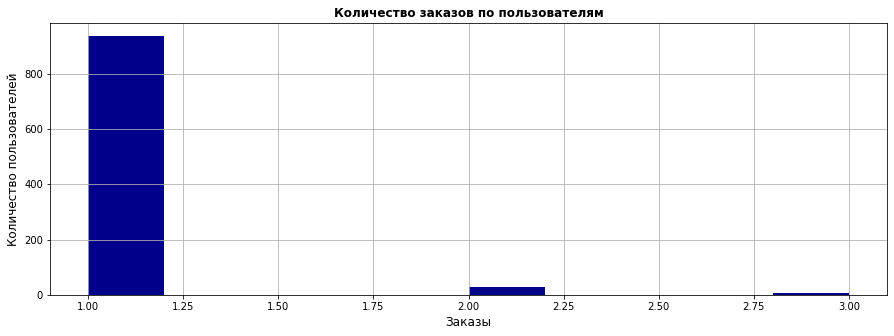

In [25]:
# Датафрейм с количеством заказов по пользователям:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg(
    {'transactionId' : pd.Series.nunique})

ordersByUsers.columns = ['visitorId','orders']

display(ordersByUsers['orders'].describe())

plt.figure(figsize=(15,5))
plt.hist(ordersByUsers['orders'], color = 'darkblue') 
plt.title('Количество заказов по пользователям', fontsize=12, fontweight='bold')
plt.xlabel('Заказы', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
plt.grid()
plt.show()

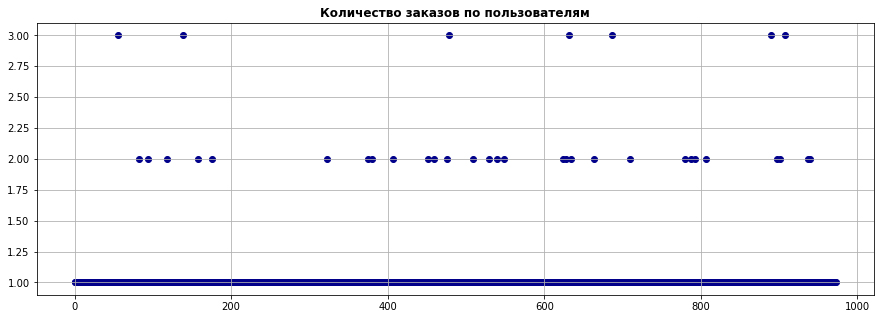

In [26]:
# построим точечную диаграмму числа заказов на одного пользователя

x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(15,5))
plt.scatter(x_values, ordersByUsers['orders'], color = 'darkblue')
plt.title('Количество заказов по пользователям', fontsize=12, fontweight='bold')
plt.grid()
plt.show()

***Вывод:***
<div style="border:solid green 1px; padding: 20px">
    
Большинство пользователей делали заказ один раз, немного и тех, кто делал два заказа. И совсем мало кто заказал три.    
</div>

**Посчитаем 95-й и 99-й перцентили количества заказов на пользователя**

Выберем границу для определения аномальных пользователей

In [27]:
# выведем значения 95-го и 99-го перцентилей

print(np.percentile(ordersByUsers['orders'], [95, 99]))

[1. 2.]


***Вывод:***
<div style="border:solid green 1px; padding: 20px">
    
Не более 5% пользователей оформляли больше одного заказа и только 1% пользователей совершили больше 2 заказов. 
   
</div>

**Построим точечный график стоимостей заказов**

count    1.016000e+03
mean     8.300815e+03
std      4.212199e+04
min      5.000000e+01
25%      1.190000e+03
50%      2.955000e+03
75%      8.134250e+03
max      1.294500e+06
Name: revenue, dtype: float64

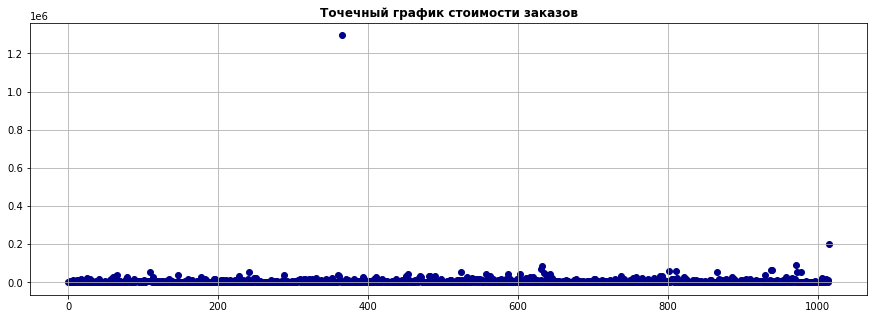

In [28]:
display(orders['revenue'].describe())

x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15,5))
plt.scatter(x_values, orders['revenue'], color = 'darkblue') 
plt.title('Точечный график стоимости заказов', fontsize=12, fontweight='bold')
plt.grid()
plt.show()


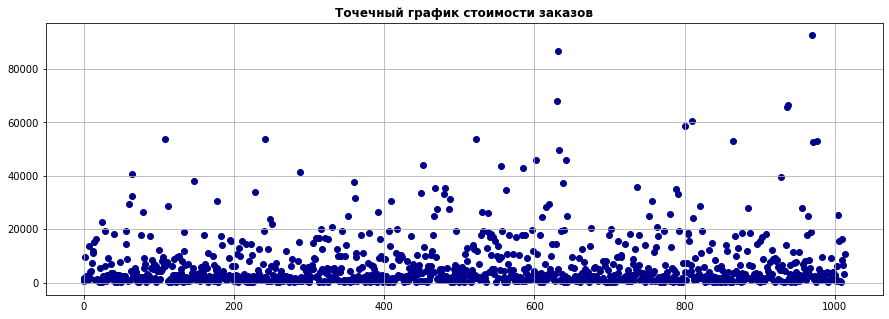

In [29]:
# построим более наглядный график, для это уберем явные выбросы с 'revenue' большим 150 тыс

x_values = pd.Series(range(0,len(orders[orders['revenue'] <= 150000]['revenue'])))
plt.figure(figsize=(15,5))
plt.scatter(x_values, orders[orders['revenue']<=150000]['revenue'], color = 'darkblue') 
plt.title('Точечный график стоимости заказов', fontsize=12, fontweight='bold')
plt.grid()
plt.show()

***Вывод:***
<div style="border:solid green 1px; padding: 20px">
    
На графике видим заказ на 1,3 млн и на 200 тысяч, которые явно выбиваются из общего порядка. Посчитаем перцентили для отсева.

На втором графике без двух самых больших выбросов видим, что основная масса заказов находится в пределах 10 000 руб.
   
</div>

**Посчитаем 95-й и 99-й перцентили стоимости заказов**

In [30]:
# выведем значения 95-го и 99-го перцентилей

print(np.percentile(orders['revenue'], [95, 99]))

[26785. 53904.]


***Вывод:***
<div style="border:solid green 1px; padding: 20px">
    
Выводы: Не более 5% заказов дороже 26 785 рублей и не более 1% дороже 53 904 рубля. Так как принято отсеивать от 1% до 5% наблюдений с крайними значениями, определим границу для определения аномальных заказов на отметке 26 785 руб.    
</div>

**Посчитаем статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным**

**Сформулируем гипотезы.**

**H0:** различий в среднем количестве заказов между группами нет.  
**H1:** различия в среднем между группами есть.  
  
Критический уровень значимости (alpha) - 0.05.  

**Метод проверки гипотез** - это непараметрический метод Манна-Уитни. 
Выбираем его потому, что этот метод работает с рангами — номерами значений в упорядоченном ряду — никак не учитывая сами значения. К этому методу прибегают тогда, когда работа с самими значениями невозможна из-за выбросов, сильно сдвигающих параметрические результаты. У нас как раз есть такие выбросы.

In [31]:
# подготовим датафрейм с фактическими и кумулятивными данными по дням

visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = (visitorsADaily
                        .apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]
                               .agg({'date':'max', 'visitorsPerDateA':'sum'}), axis=1)
                       )
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = (visitorsBDaily
                        .apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]
                               .agg({'date':'max', 'visitorsPerDateB':'sum'}), axis=1)
                       )
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]
                .groupby('date', as_index=False)
                .agg({'transactionId':pd.Series.nunique, 'revenue':'sum'})
               )
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = (ordersADaily
                      .apply(lambda x:ordersADaily[ordersADaily['date'] <= x['date']]
                             .agg({
                                    'date':'max',
                                    'ordersPerDateA':'sum',
                                    'revenuePerDateA':'sum'}), axis=1)
                      .sort_values(by=['date'])
                     )
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = (orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]
                .groupby('date', as_index=False)
                .agg({'transactionId':pd.Series.nunique, 'revenue':'sum'})
               )
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = (ordersBDaily
                      .apply(lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']]
                             .agg({
                                    'date':'max',
                                    'ordersPerDateB':'sum',
                                    'revenuePerDateB' : 'sum'}), axis=1)
                      .sort_values(by=['date'])
                     )
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

data = (ordersADaily
        .merge(ordersBDaily, left_on='date', right_on='date', how='left')
        .merge(ordersACummulative, left_on='date', right_on='date', how='left')
        .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
        .merge(visitorsADaily, left_on='date', right_on='date', how='left')
        .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
        .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
        .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
       )

display(data.head(5))

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


In [32]:
# создадим для каждой группы датафрейм с количеством заказов на пользователя

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов.  
Тем, кто ничего не заказал, будут соответствовать нули.  
Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни. 

In [33]:
# создадим списки с числом заказов каждого пользователя, включая нули

sampleA = pd.concat(
    [ordersByUsersA['orders'],pd.Series(0, index=np.arange(
    data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
    ), name='orders')],axis=0
)

sampleB = pd.concat(
    [ordersByUsersB['orders'],pd.Series(0, index=np.arange(
    data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
    ), name='orders')],axis=0
)


Применим критерий и отформатируем p-value, сократив его вывод до трёх знаков после запятой.

In [34]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat(
    [ordersByUsersA['orders'],pd.Series(0, index=np.arange(
    data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
    ), name='orders')],axis=0
)

sampleB = pd.concat(
    [ordersByUsersB['orders'],pd.Series(0, index=np.arange(
    data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
    ), name='orders')],axis=0
)

print("p-value: {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Относительный прирост конверсии группы В к конверсии группы А: {0:.3f}".format(sampleB.mean() / sampleA.mean()-1))

p-value: 0.011
Относительный прирост конверсии группы В к конверсии группы А: 0.160


***Вывод:***
<div style="border:solid green 1px; padding: 20px">
    
P-value меньше 0.05. Таким образом, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем.
Также мы видим, что в конверсии между группами есть статистически значимые различия.
Относительный прирост конверсии группы В к конверсии группы А составил 16%.  
</div>

**Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным**

**Сформулируем гипотезы.**

**H0:** различий в среднем чеке между группами нет.  
**H1:** различия в среднем чеке между группами есть.   
  
Передадим критерию *mannwhitneyu* данные о выручке с заказов и найдём относительные различия в среднем чеке между группами.  

In [35]:
print('p-value: {0:.3f}'.format(
    stats.mannwhitneyu(
        orders[orders['group']=='A']['revenue'],
        orders[orders['group']=='B']['revenue'])[1])
     )

print('Относительные различия в среднем чеке: {0:.3f}'.format(
    orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)
     )

p-value: 0.829
Относительные различия в среднем чеке: 0.287


***Вывод:***
<div style="border:solid green 1px; padding: 20px">
    
P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.   
Средний чек группы А значительно ниже среднего чека группы В (относительное различие между ними 28,7%), но наблюдаемое превышение среднего чека группы В не является значимым, получено случайно.
</div>

**Посчитаем статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным**

Ранее мы приняли за аномальных пользователей тех, кто совершил больше 2 заказов или совершил заказ дороже 27 000 рублей.

Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами.
Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 27 000 — usersWithExpensiveOrders.

Объединим их в таблице abnormalUsers.

In [36]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 27000]['visitorId']

abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
display(abnormalUsers.head(5))
print('Количество аномальных пользователей:', abnormalUsers.shape[0])


568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
Name: visitorId, dtype: int64

Количество аномальных пользователей: 58


Таким образом, мы получили 58 аномальных пользователей. 

In [37]:
# подготовим выборки количества заказов по пользователям по группам теста

sampleAFiltered = pd.concat(
    [ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],
        pd.Series(0, index = np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ), name='orders',),], axis=0,
)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],
        pd.Series(0, index = np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ), name='orders',),], axis = 0,
)

In [38]:
# применим статистический критерий Манна-Уитни к полученным выборкам

print('p-value: {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

print('Относительный прирост конверсии группы В к конверсии группы А: {0:.3f}'.format(
    sampleBFiltered.mean()/sampleAFiltered.mean()-1)
     )


p-value: 0.012
Относительный прирост конверсии группы В к конверсии группы А: 0.182


***Вывод:***
<div style="border:solid green 1px; padding: 20px">
    
Сравниваем:

Значения по сырым данным:
p-value: 0.011
Относительный прирост конверсии группы В к конверсии группы А: 0.160

Значения по очищенным данным:
p-value: 0.012
Относительный прирост конверсии группы В к конверсии группы А: 0.182

Значение p-value и результаты по среднему количеству заказов практически не изменились, таким образом, выводы по сырым данным применимы и в этом случае.

P-value по-прежнему меньше 0.05. Таким образом, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем.
</div>

**Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным**

In [39]:
print('p-value: {0:.3f}'.format(stats.mannwhitneyu(orders[np.logical_and(
        orders['group'] == 'A', np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'],
        orders[np.logical_and(orders['group'] == 'B',np.logical_not(orders['visitorId'].isin(abnormalUsers)),)
        ]['revenue'],)[1])
)

print("Относительные различия в среднем чеке: {0:.3f}".format(orders[np.logical_and(
        orders['group'] == 'B',np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'].mean()
        / orders[np.logical_and(orders['group'] == 'A',np.logical_not(orders['visitorId'].isin(abnormalUsers)),)
        ]['revenue'].mean()- 1)
)

p-value: 0.646
Относительные различия в среднем чеке: -0.048


***Вывод:***
<div style="border:solid green 1px; padding: 20px">
    
Сравниваем:

Значения по сырым данным:
p-value: 0.829
Относительные различия в среднем чеке: 0.287

Значения по очищенным данным:
p-value: 0.862
Относительные различия в среднем чеке: -0.028

P-value увеличилось, но и разница между сегментами сократилась с 29% до отрицательного значения.

P-value по-прежнему значительно больше 0.05, таким образом, гипотезу об отсутствии различий в среднем чеке между группами опровергуть не смогли. А после очистки данных средний чек группы А стал чуть больше среднего чека группы B.
</div>

# Примем решение по результатам теста

<div style="border:solid purple 2px; padding: 20px">

Имеющиеся факты:

* Есть статистически значимые различия по среднему количеству заказов между группами как по «сырым», так и по данным после фильтрации аномалий (конверсия группы B выше);  
* Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;  
* График различия конверсии между группами сообщает, что результаты группы B лучше группы A и они достаточно стабильны;  
* График различия среднего чека колебался: таким образом он позволил найти аномалии. Сделать из этого графика определённые выводы нельзя.  
* Исходя из обнаруженных фактов, тест следует остановить и признать его успешным, мы выяснили, что сегмент B лучше сегмента A.     

Хотя между группами А и В мы не обнаружили существенных отличий по выручке и среднему чеку, конверсия группы В выше конверсии группы A на 14.8%. Поэтому признаем группу B лучшей.  

По анализу результатов A/B-теста принято решение остановить тест, зафиксировав победу тестовой группы. Группа B статистически лучше группы A по метрике конверсии, но различий в средних чеках нет.
    
</div>

# Общий вывод

<div style="border:solid red 1px; padding: 20px">

В первой части проекта мы выяснили, что самая перспективная гипотеза по ICE - это **"Запустить акцию, дающую скидку на товар в день рождения"** - влияние минимально, затронет небольшое количество пользователей.  
  
А самая перспективная по RICE - это **"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"**. Действительно, добавление формы подписки имеет гораздо большее влияние и охват, а оставившие свой email пользователи скорее всего лояльны к компании и могут хорошо сконвертироваться в будущем.  
Также интересно, что топ-5 гипотез по обоим фреймворкам одинаковый, поменялся только порядок. Стоит рассматривать эту пятёрку в первую очередь.        
    
Во второй части работы был выполнен анализ результатов A/B-теста, который был проведён в целях увеличения выручки. A/B-тест проводился в августе 2019 года, за всё время проведения теста было совершено 1197 покупок. 

В работе было выполено следующее:

Построены графики кумулятивных метрик: выручки, среднего чека и конверсии по группам и графики относительного изменения среднего чека и конверсии группы B к группе A;  
Проведён анализ выбросов - посчитаны 95 и 99 перцентили числа и стоимости заказов, определены "аномальные" пользователи, к ним отнести пользователей совершивших более 2 заказов или заказ более чем на 27 тыс руб;  
Посчитана статистическая значимость различий в конверсии и среднем чеке как по исходным данным, так и по данным без выбросов.    
      
Нами получены следующие результаты:  
      
По исходным данным:  
  
* между конверсией в группах есть статистически важные различия, конверсия в группе B относительно группы A выше на 16%;
по среднему чеку различий нет, средний чек в группе B относительно группы A выше на 28.7% (тут заметно влияние единичного заказа на очень большую сумму).  
      
По данным без выбросов:  
  
* между конверсией в группах есть статистически важные различия, конверсия в группе B относительно группы A выше на 12%;
При этом, в очищенных данных относительный прирост размера среднего чека группы B -2,2%, что свидетельствует о том, что нововведения, которые тестировались на группе B, не привели к росту среднего чека покупателей.
По анализу результатов A/B-теста принято решение остановить тест, зафиксировав победу тестовой группы. Группа B статистически лучше группы A по метрике конверсии, но различий в средних чеках нет.

По условиям задачи проверяется эффективность гипотезы в плане увеличения выручки и поскольку конверсия пользователей влияет на выручку и мы получили результат, что конверсия в тестовой группе значительно увеличилась, по сравнению с контрольной, даже с учётом того, что средний чек остался без изменений, нет никакого смысла и далее продолжать тест.   
</div>